In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import scipy
import scipy.integrate
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [7]:
def lorenz63(t: float, x: np.ndarray, sigma: float = 10.0, beta: float = 8.0 / 3, rho: float = 28.0) -> np.ndarray:
    """
    Computes the time derivatives of the Lorenz '63 system, a classic chaotic system.

    The Lorenz system is defined by the following equations:
        dx/dt = sigma * (y - x)
        dy/dt = x * (rho - z) - y
        dz/dt = x * y - beta * z

    Parameters:
        t (float): Time variable (not used directly in the Lorenz system, but kept for compatibility with solvers).
        x (np.ndarray): State vector of the system [x, y, z].
        sigma (float): Prandtl number, controlling the rate of convection (default: 10.0).
        beta (float): Geometric factor, related to the physical properties of the system (default: 8/3).
        rho (float): Rayleigh number, related to the temperature difference driving the system (default: 28.0).

    Returns:
        np.ndarray: Time derivatives [dx/dt, dy/dt, dz/dt] as a 1D NumPy array.
    """
    # Unpack state variables for clarity
    x1, x2, x3 = x  # x1 -> x, x2 -> y, x3 -> z

    # Lorenz '63 system equations
    dx1_dt = sigma * (x2 - x1)          # dx/dt
    dx2_dt = x1 * (rho - x3) - x2       # dy/dt
    dx3_dt = x1 * x2 - beta * x3        # dz/dt

    # Return the time derivatives as a NumPy array
    return np.array([dx1_dt, dx2_dt, dx3_dt])

In [8]:
def lorenz63_jacobian(t: float, x: np.ndarray, sigma: float = 10.0, beta: float = 8.0 / 3, rho: float = 28.0) -> np.ndarray:
    """
    Computes the Jacobian matrix of the Lorenz '63 system at a given state.

    The Jacobian represents the linearization of the Lorenz system's dynamics around a specific state (x, y, z):
        dx/dt = sigma * (y - x)
        dy/dt = x * (rho - z) - y
        dz/dt = x * y - beta * z

    Parameters:
        t (float): Time variable (not used directly, kept for compatibility with solvers).
        x (np.ndarray): State vector of the system [x, y, z].
        sigma (float): Prandtl number, controlling the rate of convection (default: 10.0).
        beta (float): Geometric factor, related to the system's physical properties (default: 8/3).
        rho (float): Rayleigh number, related to the temperature difference driving the system (default: 28.0).

    Returns:
        np.ndarray: Jacobian matrix (3x3) evaluated at the current state as a NumPy array.
    """
    # Unpack state variables for clarity
    x1, x2, x3 = x  # x1 -> x, x2 -> y, x3 -> z

    # Define the Jacobian matrix of the Lorenz system
    jacobian = [
        [-sigma,       sigma,    0.0],       # Partial derivatives of dx/dt
        [rho - x3,     -1.0,    -x1],        # Partial derivatives of dy/dt
        [x2,           x1,      -beta]       # Partial derivatives of dz/dt
    ]

    # Convert to a NumPy array for convenient numerical use
    return np.array(jacobian)

In [26]:
N = 10000
t0 = 0.
tf = 100.
time = np.linspace(t0,tf,N)
u0 = np.array([1.0, 0.0, 0.0])

In [27]:
sol = scipy.integrate.solve_ivp(lorenz63, [t0, tf], u0, dense_output=True)

In [28]:
np.shape(sol.sol(time))

(3, 10000)

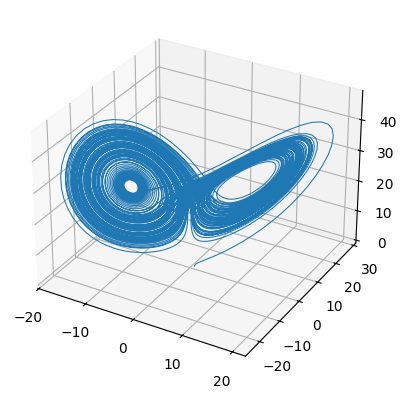

In [30]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(sol.sol(time)[0,:], sol.sol(time)[1,:], sol.sol(time)[2,:], linewidth=0.75)

In [ ]:
# SCRIVERE L'INTEGRATORE CON LYAPUNOV SITUA NON FACILE